# Задание из четвёртой лабы

Обучите один из алгоритмов классификации из библиотеки sklearn. Объяснять принцип работы классификатора в этой лабораторной не требуется

1. Выберите один из датасетов первой лабораторной


2. Найдите в данных признак, который будете предсказывать
    
    Если это категория, то у неё должно быть от 2 до 10 значений (например колонка species в датасете миграции птиц содержит 3 категории)
    
    Если признак количественный, то его нужно дискретизировать (например для популярности трека в датасете spotify можно разделить треки на 3 категории: 0-20 - популярные, 21-50 - обычные, 51 - 100 - непопулярные). Полученную категорию записать в датафрейм как отдельную колонку


3. Выделите признаки для предсказания
    
    Используйте от 2 до 5 количественных признаков для предсказания целевой переменной


4. Проверьте нормальность количественных признаков
    
    Используйте статистический тест из лекции. Если распределение является лог-нормальным, логарифмируйте его и проверьте на нормальность
    
    Как минимум 1 из признаков должен быть нормальным


5. Покажите качество предсказания модели с помощью метрик

    Метрика должна учитывать баланс классов в датасете

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
seed = 0

In [2]:
data = pd.read_csv('data/SpotifyFeatures.csv')

In [3]:
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [4]:
def score(popularity: int) -> str:
    if (popularity < 15):
        return "Very popular"
    elif (popularity < 35):
        return "Popular"
    elif (popularity < 65):
        return "Regular"
    else:
        return "Almost unknown"

data.insert(5, "categorized popularity", data.popularity.apply(score))

In [5]:
data.info()
data.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   genre                   232725 non-null  object 
 1   artist_name             232725 non-null  object 
 2   track_name              232725 non-null  object 
 3   track_id                232725 non-null  object 
 4   popularity              232725 non-null  int64  
 5   categorized popularity  232725 non-null  object 
 6   acousticness            232725 non-null  float64
 7   danceability            232725 non-null  float64
 8   duration_ms             232725 non-null  int64  
 9   energy                  232725 non-null  float64
 10  instrumentalness        232725 non-null  float64
 11  key                     232725 non-null  object 
 12  liveness                232725 non-null  float64
 13  loudness                232725 non-null  float64
 14  mode                

,genre,artist_name,track_name,track_id,popularity,categorized popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
127110,Classical,Jason Vieaux,Every Day (I Thank You),73NBBVvSOrguf3k6YHEJVf,34,Popular,0.990000,0.323,541600,0.0823,0.923000,E,0.1150,-23.467,Major,0.0425,78.638,4/4,0.104
43485,Folk,City and Colour,Little Hell,76a2G7E5M7RNpgmbZEM981,43,Regular,0.110000,0.368,281680,0.4270,0.000000,F,0.1070,-10.185,Major,0.0277,146.282,3/4,0.179
228666,Soul,EMBRZ,She Won't Let Me Down (feat. Leo Stannard) - F...,5EBOsWjb6ktTuftGPIpuuF,49,Regular,0.039000,0.815,226154,0.5410,0.003270,C#,0.2550,-9.379,Minor,0.1980,103.933,4/4,0.271
149621,Pop,Sigrid,Sight Of You,3huJOOwXX3zOgdHCbhVTJn,66,Almost unknown,0.015500,0.690,237786,0.8520,0.000036,E,0.1210,-5.989,Major,0.0408,129.916,4/4,0.480
132609,Reggae,The Movement,Ocho Rios - Original Mix,5hqUG1GKkYNOU6HA7JCChG,32,Popular,0.000783,0.610,205688,0.8440,0.000046,D,0.0608,-9.173,Major,0.0468,170.207,4/4,0.968


In [6]:
X = data[['liveness', 'danceability', 'energy', 'speechiness', 'tempo']]
y = data['categorized popularity']
Y = y.to_frame()
X.info(); print()
Y.info(); print()
Y.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   liveness      232725 non-null  float64
 1   danceability  232725 non-null  float64
 2   energy        232725 non-null  float64
 3   speechiness   232725 non-null  float64
 4   tempo         232725 non-null  float64
dtypes: float64(5)
memory usage: 8.9 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 1 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   categorized popularity  232725 non-null  object
dtypes: object(1)
memory usage: 1.8+ MB



,categorized popularity
count,232725
unique,4
top,Regular
freq,133034


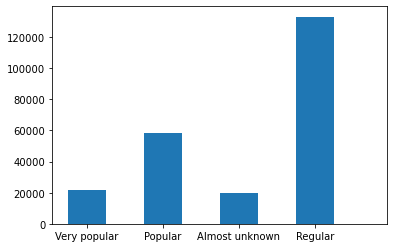

In [7]:
plt.hist(y, bins = np.arange(5) - 0.25, width = 0.5) 
plt.show()

In [8]:
def count_mean_p(sample):
    p_values = np.empty(10)
    for i in range(p_values.size):
        _, p_values[i] = stats.normaltest(sample)
    return p_values.mean()

print('Assume alpha is 0.05. If label is normally distributed, then its p-value must be greater than alpha', end = '\n\n')
for label in X:
    series = data[label]
    sample = series.sample(100, random_state = seed)
    p = count_mean_p(sample)
    print('norm test for ' + label + ' : ' + str(p))
    if (p < 0.05):
        min_val = series.min()
        if (min_val == 0):
            print('cannot lognorm here')
        else:
            max_val = series.max()
            sample = (-min_val + sample) / (max_val - min_val)
            sample = np.log(sample)
            p = count_mean_p(sample)
            print('lognorm test for ' + label + ' : ' + str(p))
    print()

Assume alpha is 0.05. If label is normally distributed, then its p-value must be greater than alpha

norm test for liveness : 2.7992284348451826e-14
lognorm test for liveness : 0.023553695610778934

norm test for danceability : 0.08985809735472765

norm test for energy : 0.0384555199194337
lognorm test for energy : 5.489535343681604e-13

norm test for speechiness : 9.595674333864835e-28
lognorm test for speechiness : 0.03951790529504442

norm test for tempo : 0.09839539238791696



In [9]:
from sklearn.kernel_approximation import RBFSampler, Nystroem
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [10]:
def pretty_print(vals_with_counts):
    vals = vals_with_counts[0]
    counts = vals_with_counts[1]
    for i in range (len(vals)):
        print(vals[i], ": ", counts[i], end = '; ')
    print()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, \
                                                    stratify=y, test_size=0.2)
sgd_clf = SGDClassifier(random_state = seed)
sgd_clf.fit(X_train, y_train)
sgd_pred = sgd_clf.predict(X_test)

precision = metrics.precision_score(y_test, sgd_pred, average = 'weighted')
recall = metrics.recall_score(y_test, sgd_pred, average = 'weighted')
f1 = metrics.f1_score(y_test, sgd_pred, average = 'weighted')
fbeta = metrics.fbeta_score(y_test, sgd_pred, average = 'weighted', beta = 2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
pretty_print(np.unique(sgd_pred, return_counts = True))
pretty_print(np.unique(y_test, return_counts = True))
print('precision: ', precision) # true positive results divided by the number of all positive results, including those not identified correctly
print('recall: ', recall)       # true positive results divided by the number of all samples that should have been identified as positive
print('f1: ', f1)               # harmonic mean of precision and recall
print('fbeta: ', fbeta)         # recall is considered beta times as important as precision
print('cross_val_f1: ', cross_val_score(sgd_clf, X, y, cv = 5, scoring = 'f1_weighted').mean())

Popular :  25797; Regular :  20651; Very popular :  97; 
Almost unknown :  3903; Popular :  11633; Regular :  26607; Very popular :  4402; 
precision:  0.47341881664889957
recall:  0.4570630572564185
f1:  0.43019201306183136
fbeta:  0.4377244974284192
cross_val_f1:  0.39320053429455104


In [13]:
nystr_feature = Nystroem(random_state = seed) 
rbf_feature = RBFSampler(gamma = 1, random_state = seed)
X_features_nystr = nystr_feature.fit_transform(X)
X_features_rbf = rbf_feature.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_features_nystr, y, shuffle=True, \
                                                    stratify=y, test_size=0.2)
sgd_clf = SGDClassifier(random_state = seed)

sgd_clf.fit(X_train, y_train)
sgd_pred = sgd_clf.predict(X_test)

precision = metrics.precision_score(y_test, sgd_pred, average = 'weighted')
recall = metrics.recall_score(y_test, sgd_pred, average = 'weighted')
f1 = metrics.f1_score(y_test, sgd_pred, average = 'weighted')
fbeta = metrics.fbeta_score(y_test, sgd_pred, average = 'weighted', beta = 2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
pretty_print(np.unique(sgd_pred, return_counts = True))
pretty_print(np.unique(y_test, return_counts = True))
print('precision: ', precision)
print('recall: ', recall)
print('f1: ', f1)
print('fbeta: ', fbeta)
print('cross_val_f1: ', cross_val_score(sgd_clf, X_features_nystr, y, cv = 5, scoring = 'f1_weighted').mean())

Popular :  729; Regular :  45764; Very popular :  52; 
Almost unknown :  3903; Popular :  11633; Regular :  26607; Very popular :  4402; 
precision:  0.4691993972955767
recall:  0.5724567622730691
f1:  0.4288264379496352
fbeta:  0.5028503751621518
cross_val_f1:  0.42593329716236406


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_features_rbf, y, shuffle=True, \
                                                    stratify=y, test_size=0.2)
sgd_clf = SGDClassifier(random_state = seed)
sgd_clf.fit(X_train, y_train)
sgd_pred = sgd_clf.predict(X_test)

precision = metrics.precision_score(y_test, sgd_pred, average = 'weighted')
recall = metrics.recall_score(y_test, sgd_pred, average = 'weighted')
f1 = metrics.f1_score(y_test, sgd_pred, average = 'weighted')
fbeta = metrics.fbeta_score(y_test, sgd_pred, average = 'weighted', beta = 2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
pretty_print(np.unique(sgd_pred, return_counts = True))
pretty_print(np.unique(y_test, return_counts = True))
print('precision: ', precision)
print('recall: ', recall)
print('f1: ', f1)
print('fbeta: ', fbeta)
print('cross_val_f1: ', cross_val_score(sgd_clf, X_features_rbf, y, cv = 5, scoring = 'f1_weighted').mean())

Popular :  305; Regular :  46196; Very popular :  44; 
Almost unknown :  3903; Popular :  11633; Regular :  26607; Very popular :  4402; 
precision:  0.44054632494635954
recall:  0.5713395638629284
f1:  0.42075754831459133
fbeta:  0.4989648575409292
cross_val_f1:  0.4199341352320154
